# Trust Region Methods

In [4]:
%run ~/.jupyter/config.ipy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import plots as p
import algos
import functions as funcs

from functools import partial
import matplotlib.pyplot as plt

import autograd.numpy as np
from autograd import grad, jacobian, hessian

assert "autograd" in np.__file__ # Need to make sure that we get the correct numpy

# Cauchy Point + Dogleg

In [109]:
Q = funcs.gen_psd_matrix(2)
x0 = 2 * (np.random.random(2) - 0.5)

5


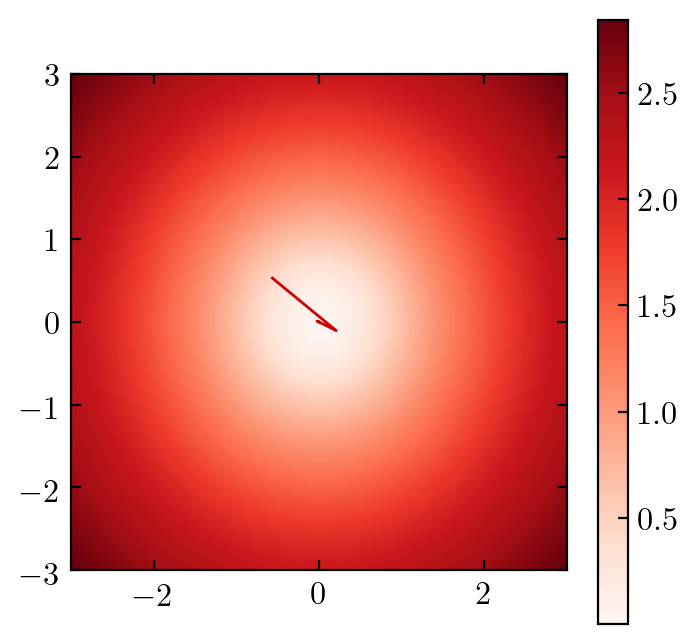

In [112]:
f = partial(funcs.f_one, Q)
ax = p.surface_2d(f, typ="image", lim=[-3, 3, -3, 3])

# Just change the subproblem solver to use the other
pos = algos.trust_region(f, grad(f), hessian(f), x0, algos.dogleg)
print(len(pos))
ax.plot(pos[:, 0], pos[:, 1])

# Large problem

In [131]:
dims = 10
Q = funcs.gen_psd_matrix(dims)
x0 = 2 * (np.random.random(dims) - 0.5)

In [132]:
f = partial(funcs.f_one, Q)

for algo in [algos.cauchy_point, algos.dogleg]:
    pos = algos.trust_region(f, grad(f), hessian(f), x0, algo)
    print(len(pos))

981


AssertionError: 